In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

In [6]:
# Cargar el dataset
df = pd.read_csv("Mall_Customers.csv")

# Exploración inicial de los datos
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Descripción estadística:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


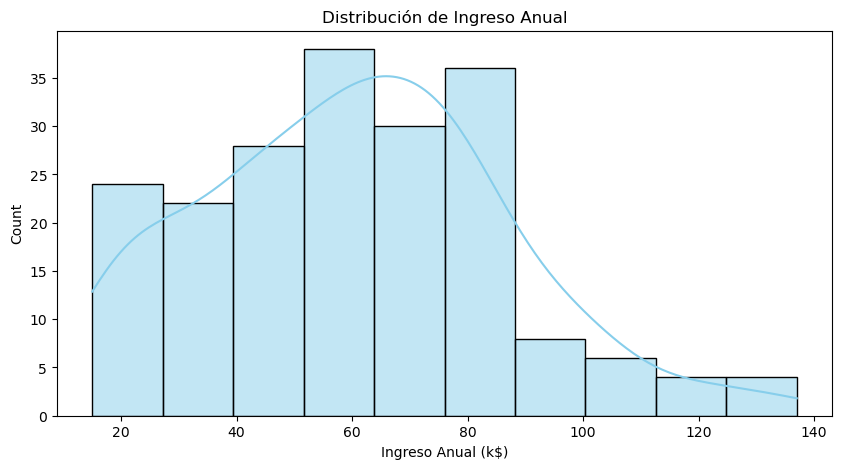

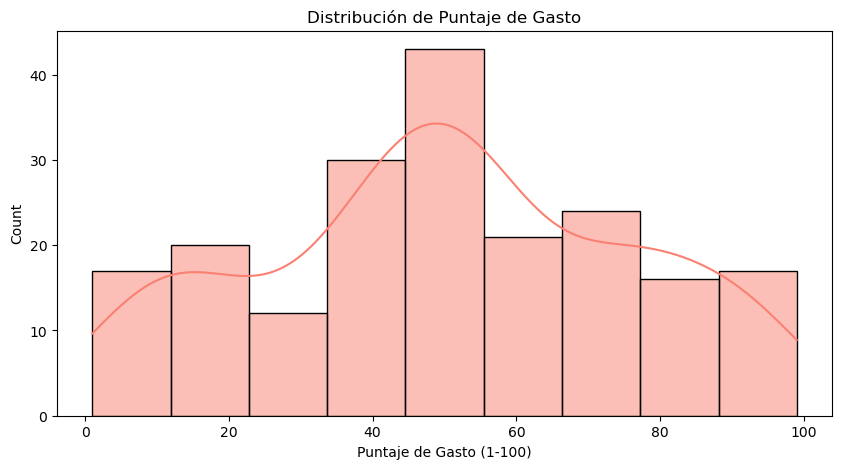

In [8]:
# Descripción estadística
print("\nDescripción estadística:")
display(df.describe())

# Distribución de 'Annual Income (k$)'
plt.figure(figsize=(10, 5))
sns.histplot(df['Annual Income (k$)'], kde=True, color='skyblue')
plt.title('Distribución de Ingreso Anual')
plt.xlabel('Ingreso Anual (k$)')
plt.show()

# Distribución de 'Spending Score (1-100)'
plt.figure(figsize=(10, 5))
sns.histplot(df['Spending Score (1-100)'], kde=True, color='salmon')
plt.title('Distribución de Puntaje de Gasto')
plt.xlabel('Puntaje de Gasto (1-100)')
plt.show()

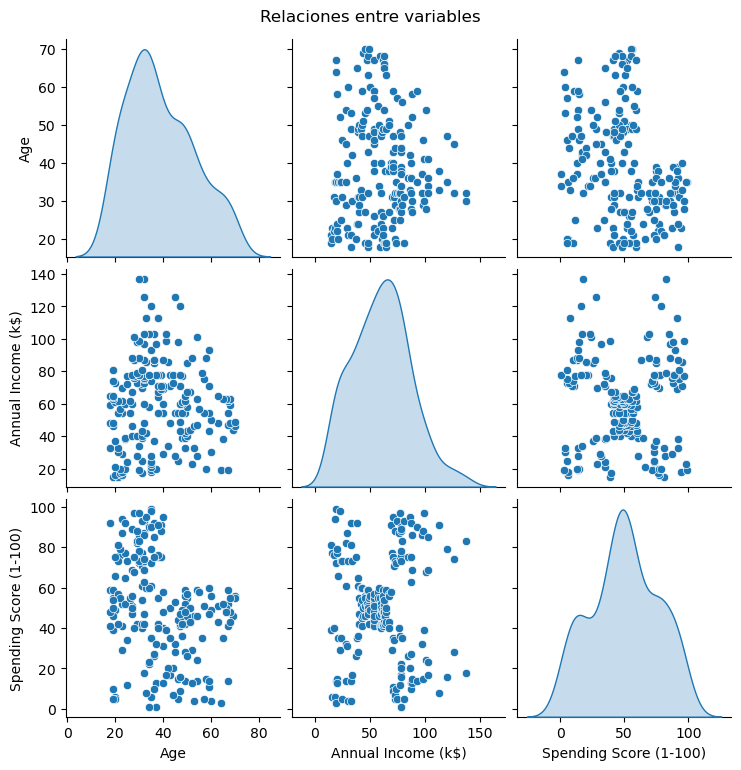

In [10]:
# Análisis de relaciones entre variables
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Relaciones entre variables', y=1.02)
plt.show()

In [12]:
# Verificación y manejo de valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# En este caso no hay valores faltantes en el dataset

Valores faltantes por columna:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [14]:
# Selección de características para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Escalado de características
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

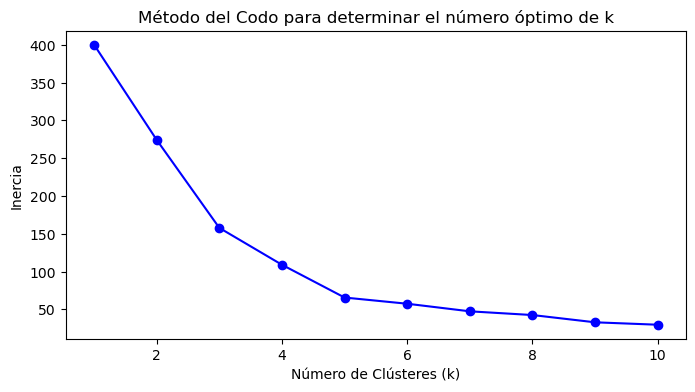

In [42]:
# Método del Codo para determinar el número óptimo de clústeres
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Visualización del método del codo
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de k')
plt.show()


In [18]:
# Entrenar el modelo con el número óptimo de clústeres (por ejemplo, k=5)
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=0)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Agregar las etiquetas de clúster al dataset original
df['Cluster'] = labels

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calcular el Coeficiente de Silhouette e Índice de Calinski-Harabasz
silhouette_avg = silhouette_score(X_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

print(f"Coeficiente de Silhouette: {silhouette_avg}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz}")

Coeficiente de Silhouette: 0.5546571631111091
Índice de Calinski-Harabasz: 248.64932001536357


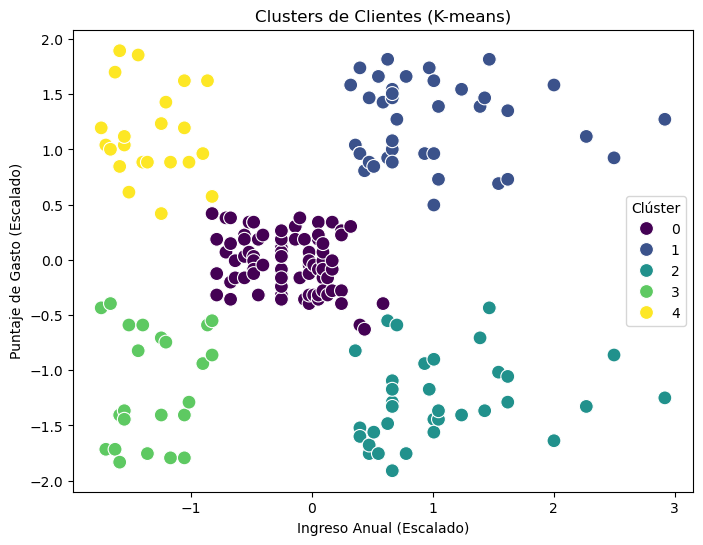

In [22]:
# Visualización de los clústeres en un gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette="viridis", s=100)
plt.xlabel('Ingreso Anual (Escalado)')
plt.ylabel('Puntaje de Gasto (Escalado)')
plt.title('Clusters de Clientes (K-means)')
plt.legend(title='Clúster')
plt.show()